In [1]:
from seq2sec.apply import Protein
from seq2sec.model import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# load model and set to eval
net = load('./models/teste-uncloss-ss3_ss4_buried.pth') 
# net = load('./models/resnet_mt_3-4_cath95.pth')

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'seq2sec.model.ResNet2' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
# read fasta
p = Protein("./fasta_sequences/start2fold/P0A7Y4.fasta")
p.predict_with(net.predict)

In [4]:
p.seq

'MLKQVEIFTDGSCLGNPGPGGYGAILRYRGREKTFSAGYTRTTNNRMELMAAIVALEALKEHCEVILSTDSQYVRQGITQWIHNWKKRGWKTADKKPVKNVDLWQRLDAALGQHQIKWEWVKGHAGHPENERCDELARAAAMNPTLEDTGYQVEV'

In [5]:
p.prediction['ss_cons_3_label']

'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC'

In [6]:
p.prediction['ss_cons_4_label']

'EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE'

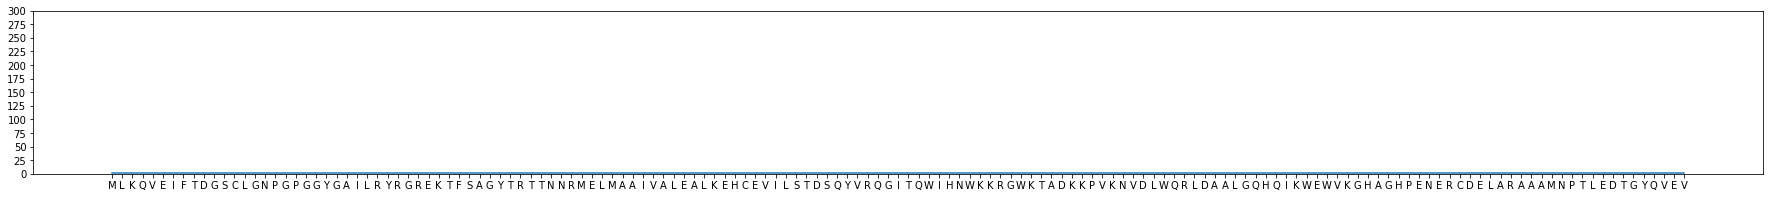

In [7]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3))
plt.plot(p.prediction['buriedI_abs']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,301,25));

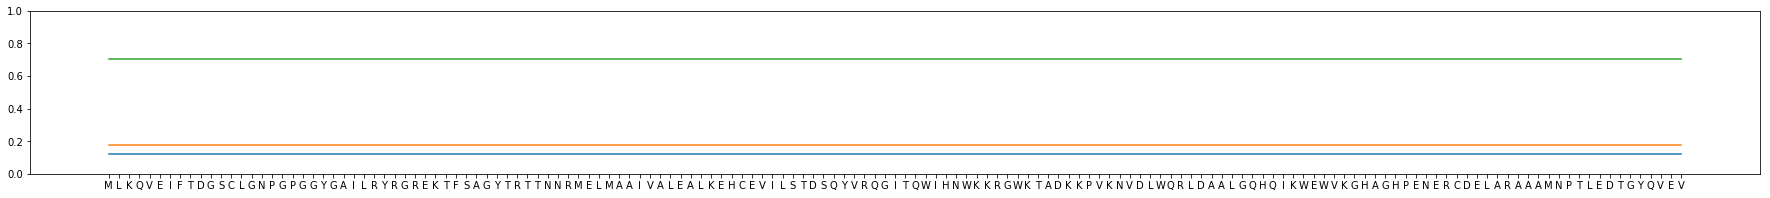

In [8]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.probabilities['ss_cons_3_label']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,1.01,0.2));

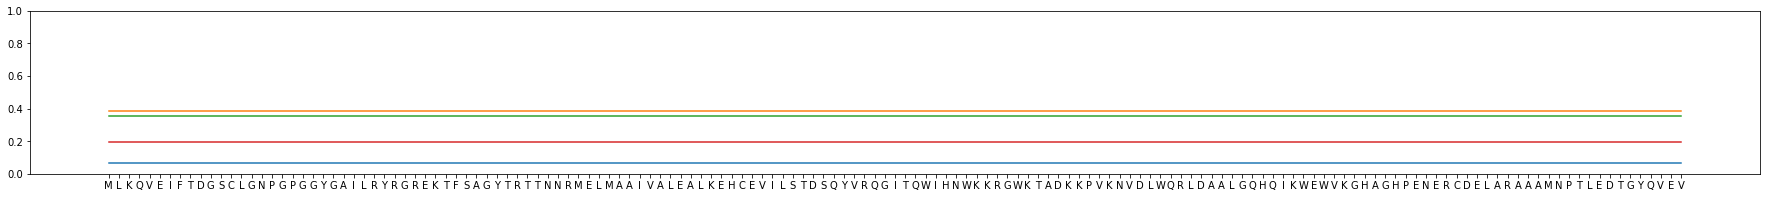

In [9]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.probabilities['ss_cons_4_label']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,1.01,0.2));

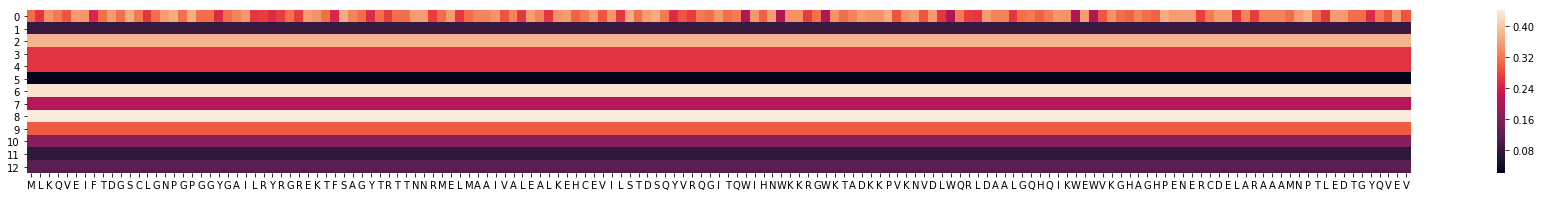

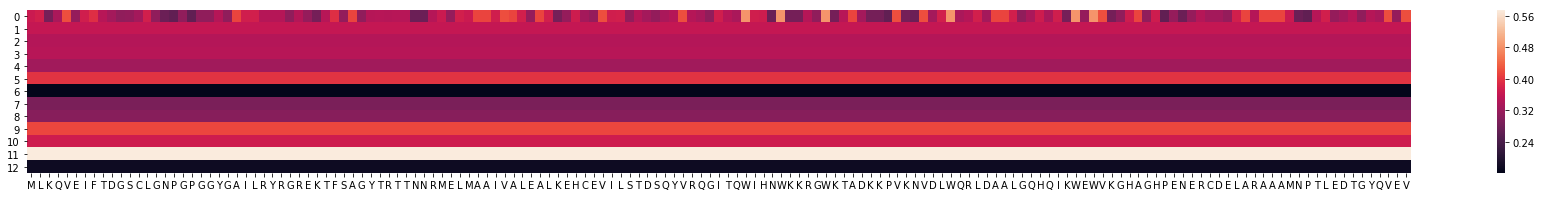

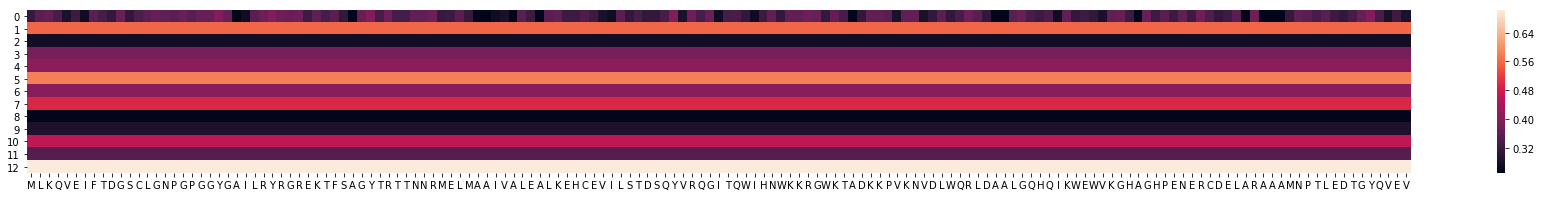

In [10]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][0]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][1]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][2]), xticklabels=list(p.seq));

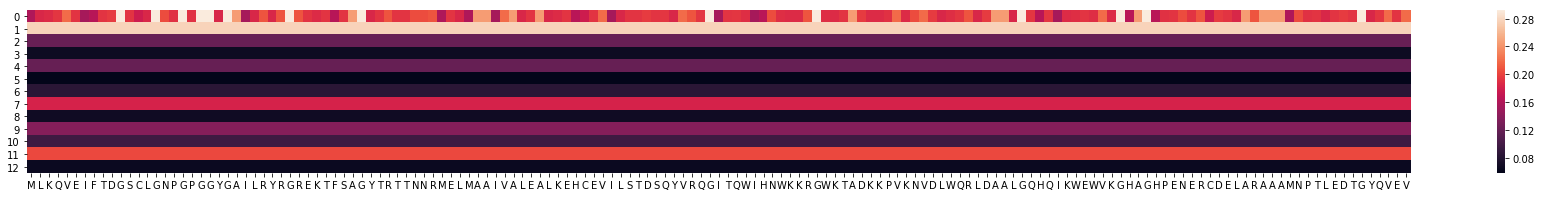

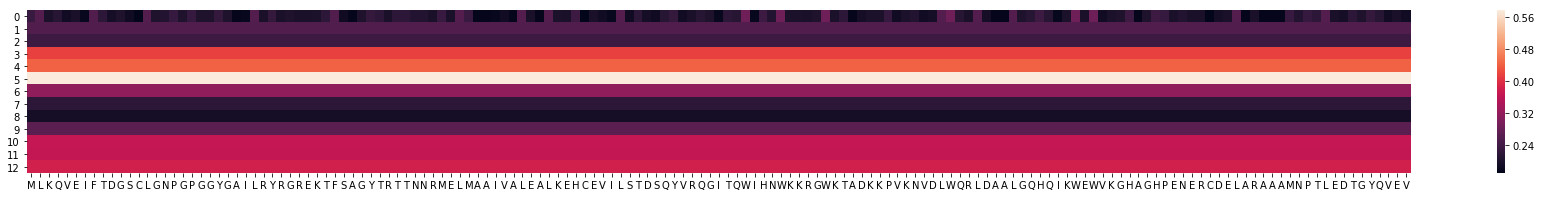

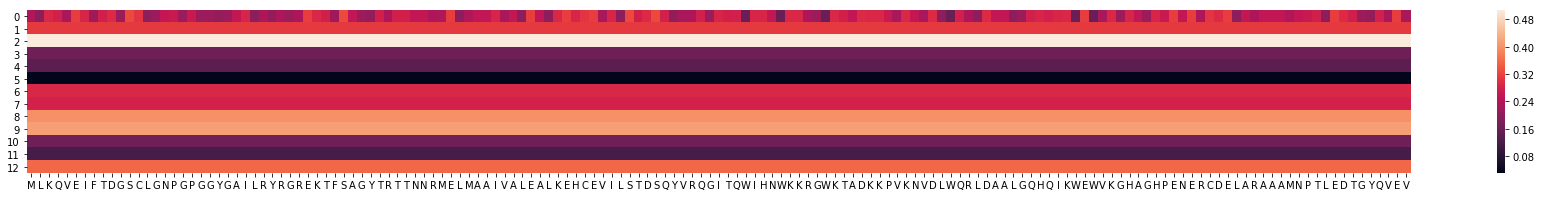

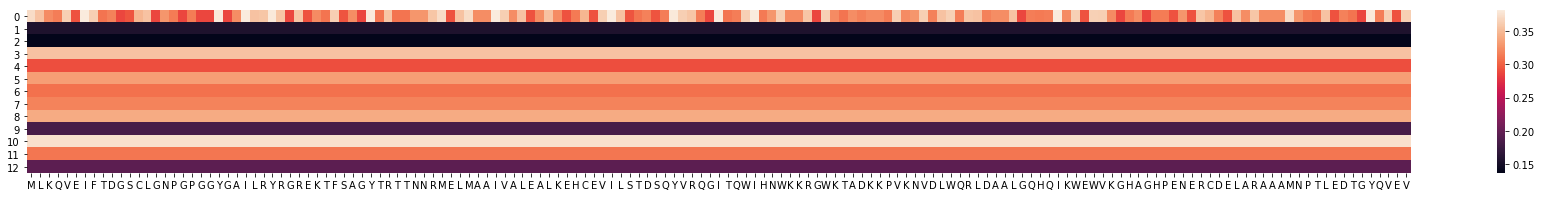

In [11]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][0]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][1]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][2]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][3]), xticklabels=list(p.seq));

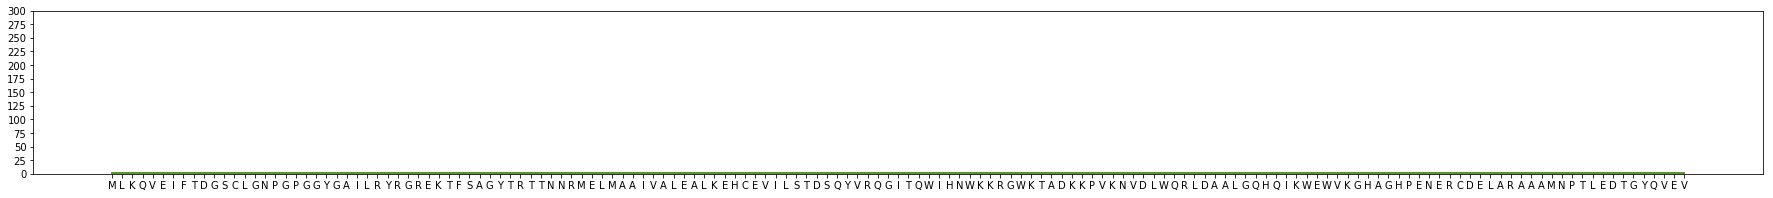

In [12]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.steps['buriedI_abs']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,301,25));

In [84]:
p.probabilities['ss_cons_3_label']

array([[1.88557759e-01, 6.47117570e-02, 7.46730447e-01],
       [1.75948620e-01, 7.79389888e-02, 7.46112406e-01],
       [1.21913953e-02, 3.34216803e-01, 6.53591812e-01],
       [1.09428294e-01, 2.14973822e-01, 6.75597847e-01],
       [2.20053241e-01, 3.15108776e-01, 4.64837998e-01],
       [1.06166616e-01, 4.27823544e-01, 4.66009855e-01],
       [1.78096682e-01, 3.15189362e-01, 5.06713927e-01],
       [1.93497777e-01, 3.78058940e-01, 4.28443253e-01],
       [2.85817236e-01, 6.05775774e-01, 1.08406939e-01],
       [1.89486071e-01, 1.60552472e-01, 6.49961472e-01],
       [7.87124876e-03, 3.45020629e-02, 9.57626700e-01],
       [6.35359576e-03, 5.10137528e-02, 9.42632675e-01],
       [1.14617765e-01, 2.87532038e-03, 8.82506967e-01],
       [7.11357966e-02, 1.63787091e-03, 9.27226305e-01],
       [5.53340465e-03, 4.59849462e-02, 9.48481679e-01],
       [4.16145884e-02, 3.79462005e-03, 9.54590797e-01],
       [1.15776882e-02, 8.03811010e-03, 9.80384171e-01],
       [2.63509918e-02, 5.39422

In [85]:
p.steps['ss_cons_3_label'][0,50,-3:]

array([0.08839291, 0.9995654 , 0.00187012], dtype=float32)